In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train.csv")

In [2]:
test=pd.read_csv("Test.csv")

In [3]:

y_train=np.array(train.target)
y_test=np.array(test.target)


In [4]:
train=np.array(train)
test=np.array(test)
x_train=np.array(train[:,:5])
x_test=np.array(test[:,:5])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966735574959


In [7]:
print("training score is %0.4f"%lr.score(x_train,y_train))
print("training score is %0.4f"%lr.score(x_test,y_test))

training score is 0.9661
training score is 0.9691


# 1 features
it is 5

In [8]:
## 2.gradient descent 

In [9]:
import numpy as np

In [10]:
def needed_x(x_train,i):
    X=(x_train[i,:])
    X.reshape((-1,1))
    return(X)


In [11]:
y_train=np.array(y_train)
x_train=np.array(x_train)

In [12]:
def hypothesis(theta,x_train,i):
    X=needed_x(x_train,i) 
    theta=np.transpose(theta)
    return(np.dot(theta,X))
        
        

In [13]:
def gradient(theta,y_train,x_train,j,indices):
    m=x_train.shape[0]
    grad=0.0
    for i in indices:
        grad+=(hypothesis(theta,x_train,i)-y_train[i])*x_train[i][j]
    return(grad)
    
    

In [25]:
def error(theta,x_train,y_train):
    loss=0
    m=x_train.shape[0]
    for i in range(m):
        hyp=hypothesis(theta,x_train,i)
        loss+=(hyp-y_train[i])**2
    return(loss*0.5)

In [15]:
def grad_inter(theta,y_train,x_train,indices):
    grad=0.0
    for i in indices:
        grad+=(hypothesis(theta,x_train,i)-y_train[i])
    return(grad)

In [26]:
def gradientdescent(x_train,y_train,learning_rate=0.001,batch_size=1):
    theta=np.zeros((5,))
    m=x_train.shape[0]
    inter=0
    err=[]
    indices=np.arange(m)
    temp=error(theta,x_train,y_train)
    error_change=temp
    while(error_change>0.0001): 
        indices=np.arange(m)
        np.random.shuffle(indices)
        indices=indices[:batch_size]
        for j in range(5):
            grad=gradient(theta,y_train,x_train,j,indices)
            theta[j]=theta[j]-learning_rate*grad
        inter=inter-learning_rate*grad_inter(theta,y_train,x_train,indices)
        error_change=temp-error(theta,x_train,y_train)
        temp=error(theta,x_train,y_train)
        err.append(temp)
    return theta,inter,err
    

## for stochastic 

In [33]:
ftheta,finter,error=gradientdescent(x_train,y_train)
print(ftheta)
print("final intercept is %0.4f"%(finter))

TypeError: 'list' object is not callable

In [34]:
import matplotlib.pyplot as plt
m=x_train.shape[0]

## GD

In [35]:

ftheta,finter,err=gradientdescent(x_train,y_train,batch_size=m)
print(ftheta)
print("final intercept is %0.4f"%(finter))

TypeError: 'list' object is not callable

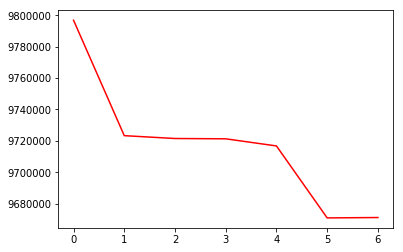

In [41]:
plt.plot(error,color='red')

plt.show()

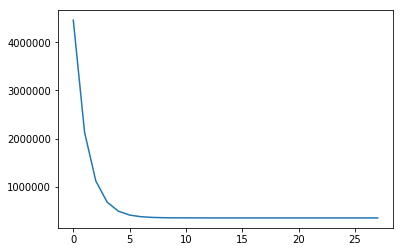

In [37]:
plt.plot(err)

plt.show()

In [42]:
print(err)

[4459151.828936184, 2131033.4170544553, 1119112.717068483, 680928.318452881, 492173.8700680805, 411382.31106289756, 377051.0270724842, 362576.3670757386, 356523.6001227602, 354013.82010985847, 352981.9579446621, 352561.3037244094, 352391.24752470304, 352323.06196026853, 352295.9407490413, 352285.2370342211, 352281.0446235976, 352279.4146122334, 352278.78538985684, 352278.54418456496, 352278.45234851463, 352278.41761489655, 352278.4045634803, 352278.3996905134, 352278.3978824414, 352278.3972156421, 352278.39697117725, 352278.39688205015]


In [47]:
def coeffofdet(x_train,y_train,ftheta):
    m=x_train.shape[0]
    upp=0
    low=0
    for i in range(m):
        upp+=y_train[i]-hypothesis(ftheta,x_train,i)
        low+=y_train[i]-y_train[i].mean()
    coeff=1-(upp/low)
    return coeff

In [48]:
print(coeffofdet(x_train,y_train,ftheta))

-inf


C:\Users\LENOVO\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
